# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin CarDataset-Splits-1-Train.csv
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline:

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## Thông tin của tác giả, ngày cập nhật

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import os

class CarImageGridDisplay:
    def __init__(self, csv_path, base_image_path, num_imgs_per_row=10, img_size=(150, 150)):
        """
        Khởi tạo class với các tham số
        
        Parameters:
        -----------
        csv_path : str
            Đường dẫn đến file CSV chứa thông tin ảnh
        base_image_path : str
            Đường dẫn đến thư mục gốc chứa ảnh
        num_imgs_per_row : int
            Số ảnh hiển thị trên mỗi dòng (mặc định: 10)
        img_size : tuple
            Kích thước ảnh (width, height) (mặc định: 150x150)
        """
        self.csv_path = csv_path
        self.base_image_path = Path(base_image_path)
        self.num_imgs_per_row = num_imgs_per_row
        self.img_size = img_size
        self.df = pd.read_csv(csv_path)
        
        # Mapping CategoryID với tên thương hiệu
        self.category_names = {
            0: 'Others',
            1: 'Honda',
            2: 'Hyundai',
            3: 'KIA',
            4: 'Mazda',
            5: 'Mitsubishi',
            6: 'Suzuki',
            7: 'Toyota',
            8: 'VinFast'
        }
        
    def load_and_resize_image(self, img_path):
        """Đọc và resize ảnh theo kích thước định trước"""
        full_path = self.base_image_path / img_path
        img = cv2.imread(str(full_path))
        if img is None:
            print(f"Không thể đọc ảnh: {full_path}")
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return cv2.resize(img, self.img_size)
    
    def display_category_grid(self):
        """Hiển thị lưới ảnh cho từng category"""
        # Nhóm dữ liệu theo categoryID
        grouped = self.df.groupby('CategoryID')
        
        for category_id, group in grouped:
            # Lấy tên thương hiệu
            brand_name = self.category_names[category_id]
            
            # Lấy danh sách ảnh cho category
            image_paths = group['ImageFullPath'].tolist()
            total_images = len(image_paths)
            
            # Chọn ngẫu nhiên ảnh nếu có nhiều hơn số ảnh cần hiển thị
            if total_images > self.num_imgs_per_row:
                image_paths = random.sample(image_paths, self.num_imgs_per_row)
            
            # Tạo lưới ảnh
            fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 4))
            fig.suptitle(f'{brand_name} (CategoryID: {category_id}) - Total Images: {total_images}')
            
            # Xử lý trường hợp chỉ có 1 ảnh
            if len(image_paths) == 1:
                axes = [axes]
            
            # Hiển thị từng ảnh
            for idx, (ax, img_path) in enumerate(zip(axes, image_paths)):
                img = self.load_and_resize_image(img_path)
                if img is not None:
                    ax.imshow(img)
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()
    
    def run(self):
        """Chạy chương trình hiển thị"""
        print(f"Đang xử lý file: {self.csv_path}")
        print(f"Thư mục ảnh: {self.base_image_path}")
        print(f"Số ảnh mỗi dòng: {self.num_imgs_per_row}")
        print(f"Kích thước ảnh: {self.img_size}")
        self.display_category_grid()

Đang xử lý file: /kaggle/input/car-cs114/car_split/car_split/CarDataset.csv
Thư mục ảnh: /kaggle/input/car-cs114/dataset
Số ảnh mỗi dòng: 10
Kích thước ảnh: (150, 150)


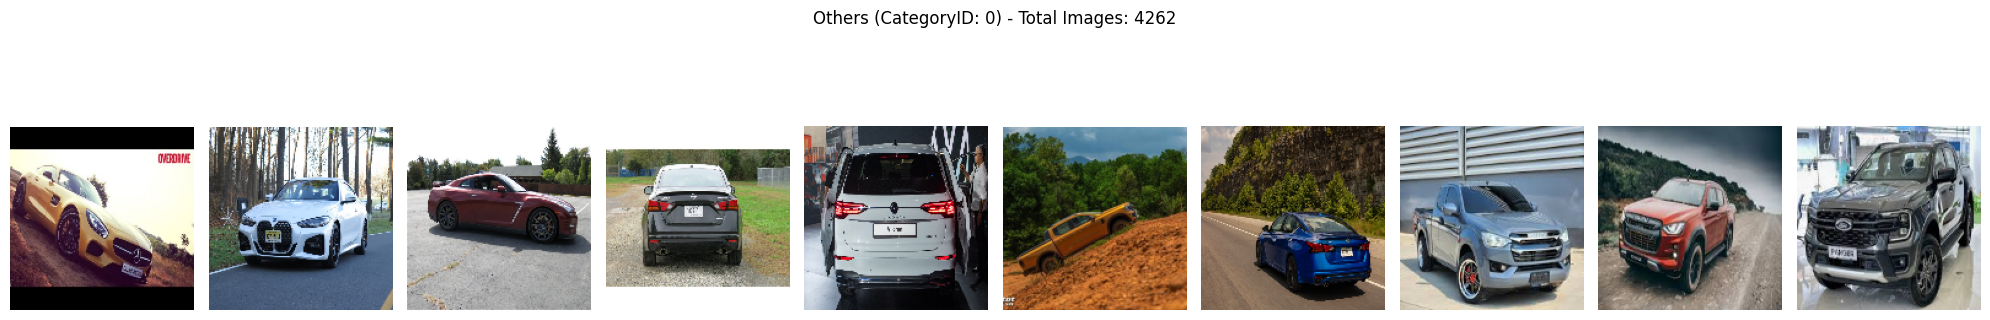

Không thể đọc ảnh: /kaggle/input/car-cs114/dataset/Honda/22521560-22521614.Honda.37.jpg


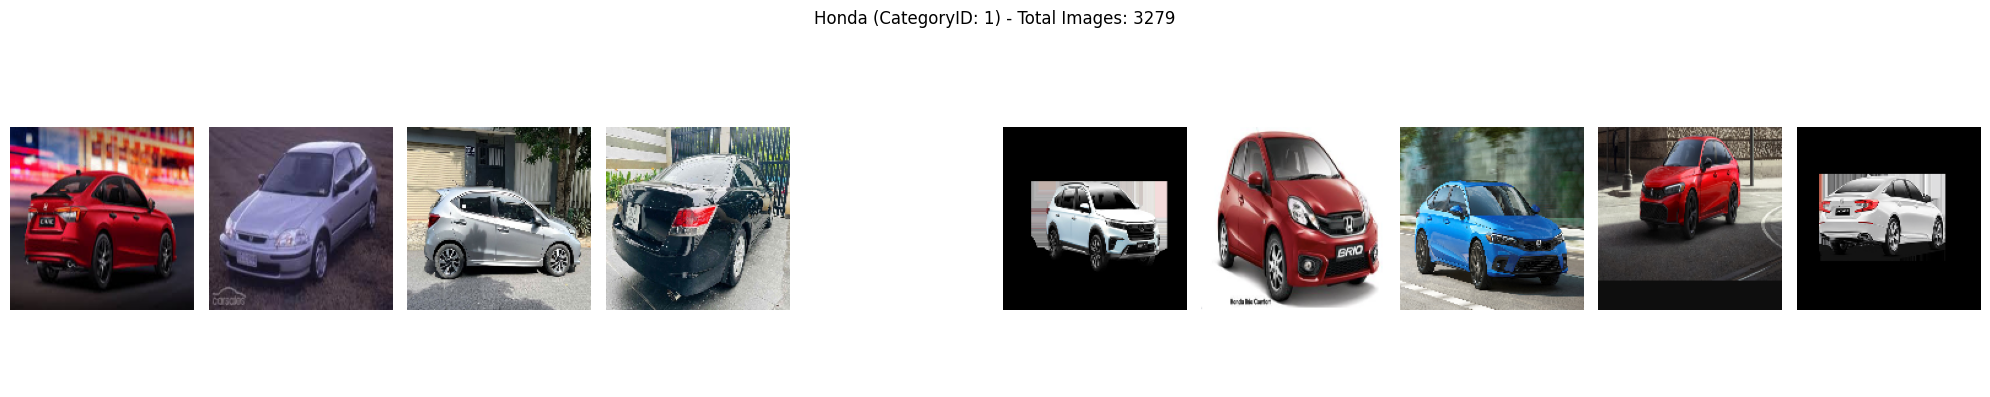

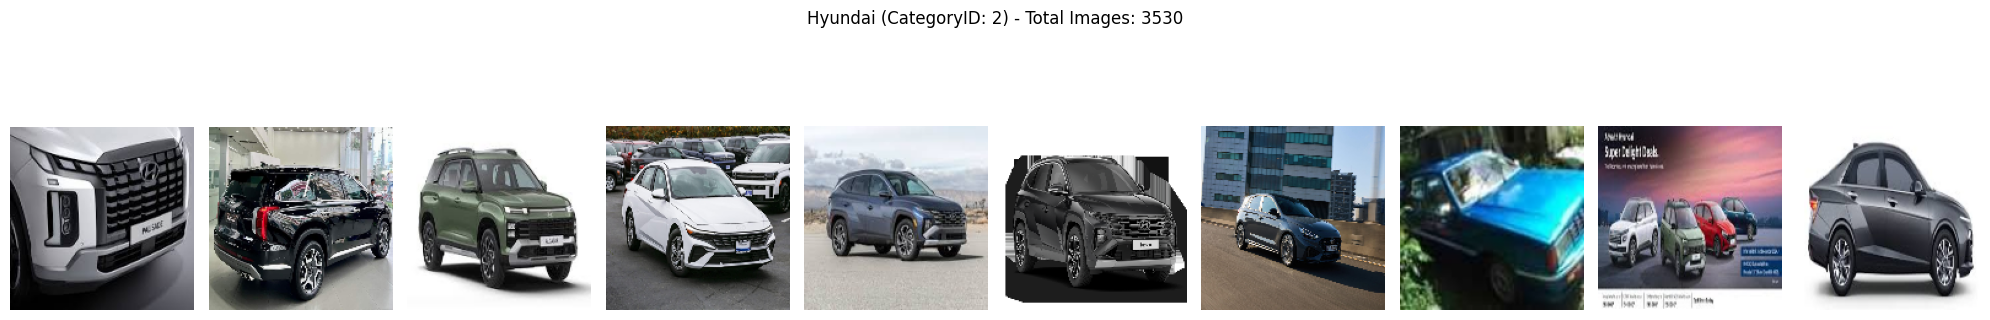

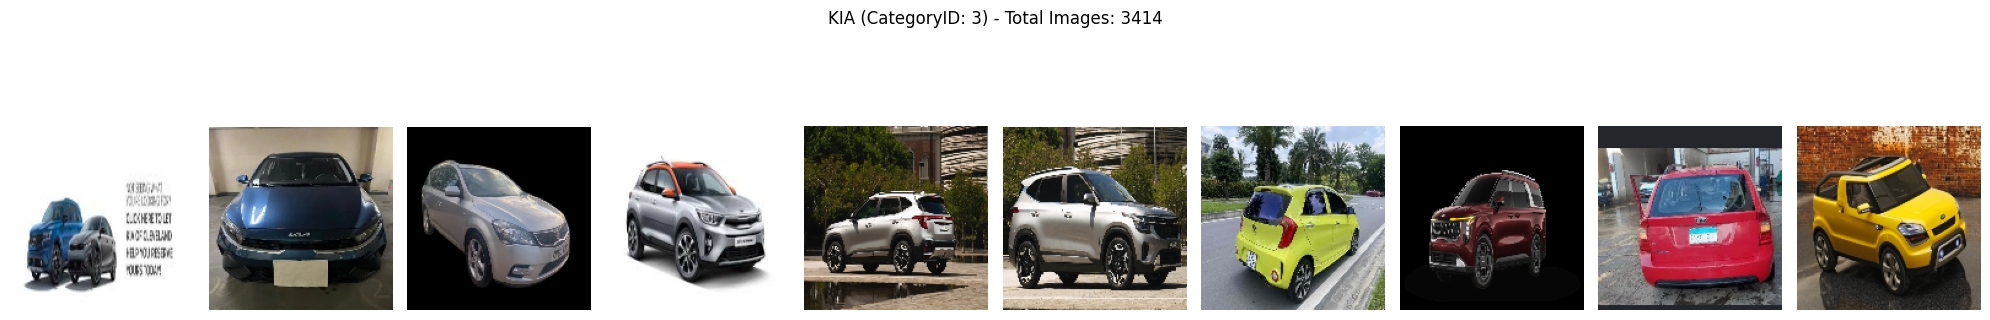

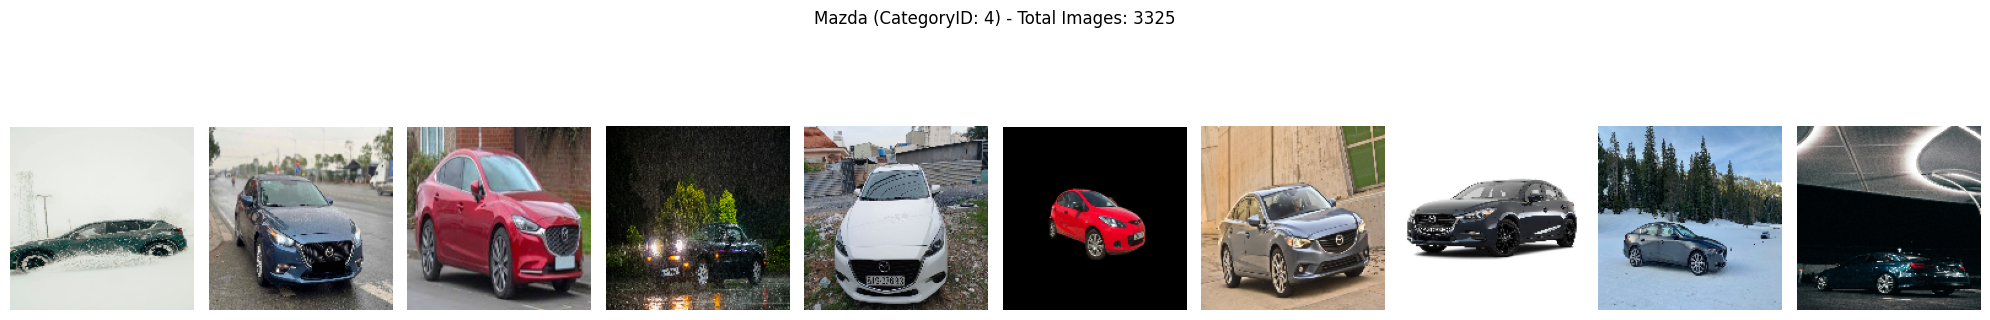

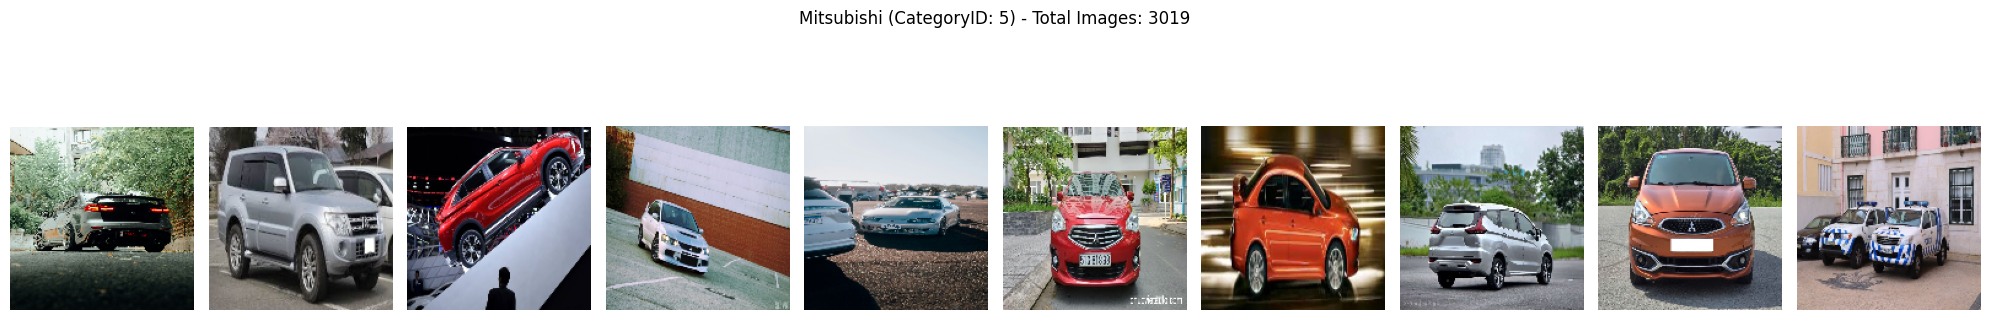

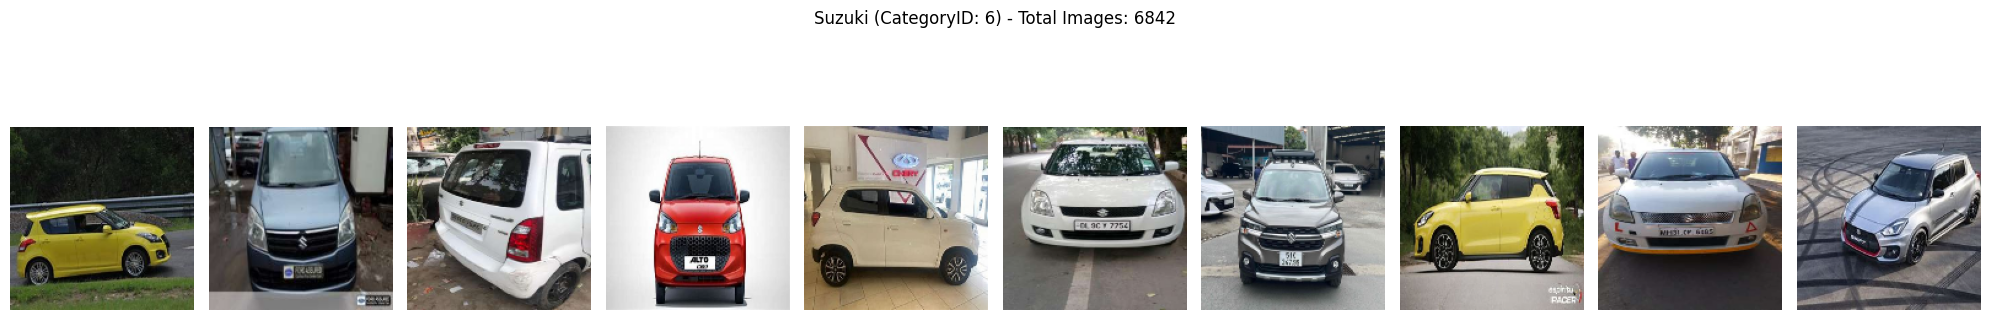

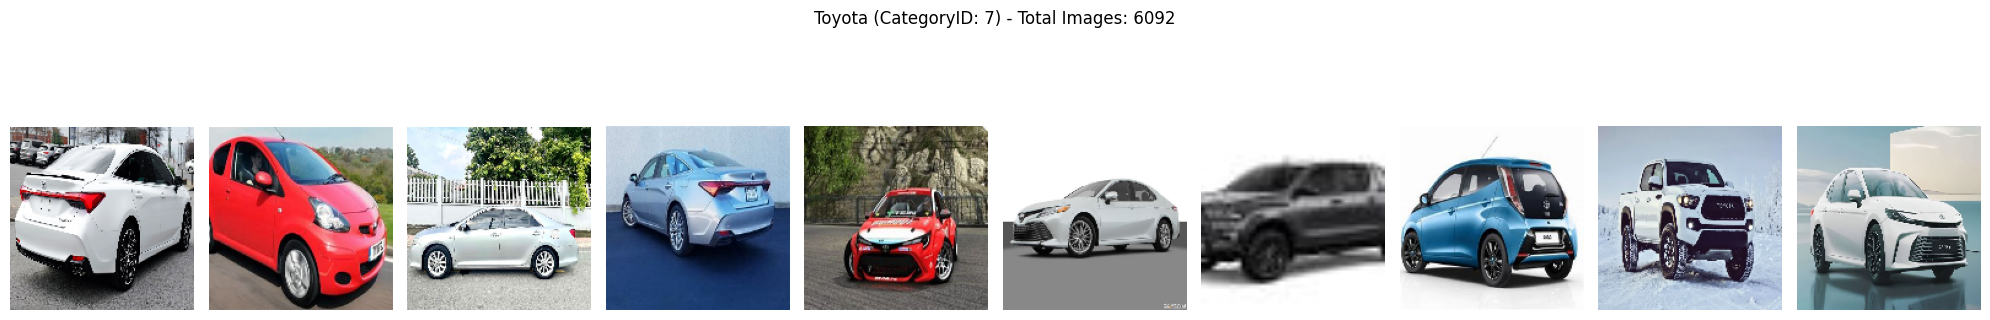

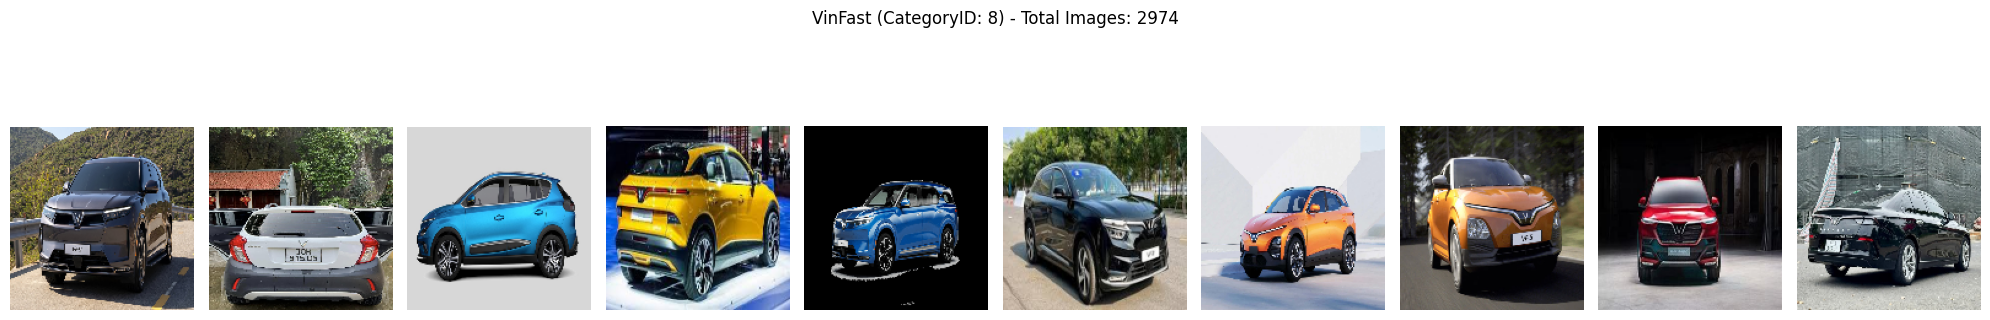

In [5]:
csv_path = "/kaggle/input/car-cs114/car_split/car_split/CarDataset.csv"
base_image_path = "/kaggle/input/car-cs114/dataset"

display = CarImageGridDisplay(
    csv_path=csv_path,
    base_image_path=base_image_path,
    num_imgs_per_row=10,
    img_size=(150, 150)
)
display.run()

In [7]:
## Thống kê các size ảnh
import os
from PIL import Image
from collections import Counter

# Đường dẫn đến folder dataset
image_folder_path = '/kaggle/input/car-cs114/dataset'

# Đường dẫn đến file CSV
csv_path = '/kaggle/input/car-cs114/car_split/car_split/CarDataset.csv'

# Đọc file CSV
with open(csv_path, 'r') as f:
    lines = f.readlines()

# Bỏ dòng tiêu đề
image_paths = [line.strip().split(',')[0] for line in lines[1:]]

# Thống kê kích thước ảnh
image_sizes = []

for image_path in image_paths:
    full_image_path = os.path.join(image_folder_path, image_path)
    try:
        with Image.open(full_image_path) as img:
            size = img.size  # (width, height)
            image_sizes.append(size)
    except Exception as e:
        print(f"Không thể mở ảnh: {full_image_path}. Lỗi: {e}")

# Đếm số lượng mỗi kích thước
size_counts = Counter(image_sizes)

for size, count in size_counts.items():
    print(f"Kích thước {size}: {count} ảnh")

Không thể mở ảnh: /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.4.jpg. Lỗi: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.4.jpg'
Không thể mở ảnh: /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.3.jpg. Lỗi: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.3.jpg'
Không thể mở ảnh: /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.7.jpg. Lỗi: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.7.jpg'
Không thể mở ảnh: /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.10.jpg. Lỗi: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.10.jpg'
Không thể mở ảnh: /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.8.jpg. Lỗi: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.8.jpg'
Không thể mở ảnh: /kaggle/input/c